# Tight Binding
## Single s-wave model
### Let $\phi_s$ be a s wave function
### One can construct a Bloch wave, $\psi$, on a periodic lattice

$\psi_{\mathbf{k}}(\mathbf{r})=\frac{1}{\sqrt{N}} \sum_{\mathbf{R}} e^{i \mathbf{k} \cdot \mathbf{R}} \phi_{s}(\mathbf{r}-\mathbf{R})$

### Dispersion relation can be found from the expectation value of Hamiltonian

$E(\mathbf{k})=\int \psi_{\mathbf{k}}^{*}(\mathbf{r}) H \psi_{\mathbf{k}}(\mathbf{r}) d \mathbf{r}$

### Above equation can be re-written in terms of s waves [[Reading Material]](http://www.physics.rutgers.edu/~eandrei/chengdu/reading/tight-binding.pdf)

$E(\mathbf{k})=\sum_{\mathbf{R} }e^{i \mathbf{k} \cdot \mathbf{R}} \int \phi_{s}^{*}(\mathbf{x}) H \phi_{s}\left(\mathbf{x}-\mathbf{R}\right) d \mathbf{x}$

### After some manupilation,

$E(\mathbf{k})=\epsilon+t\sum_{\boldsymbol{n}}{} e^{i \mathbf{k} \cdot \boldsymbol{n}} $


### Where, $\epsilon$, t and $\boldsymbol{n}$ are, on-site, overlap energies and neigherest neighbor vector repectively

$\epsilon=\int \phi_{s}^{*}(\mathbf{x}) H \phi_{s}(\mathbf{x}) d \mathbf{x}$ $\qquad$
$t=\int \phi_{s}^{*}(\mathbf{x}) H \phi_{s}(\mathbf{x}-\boldsymbol{n}) d \mathbf{x}$

### 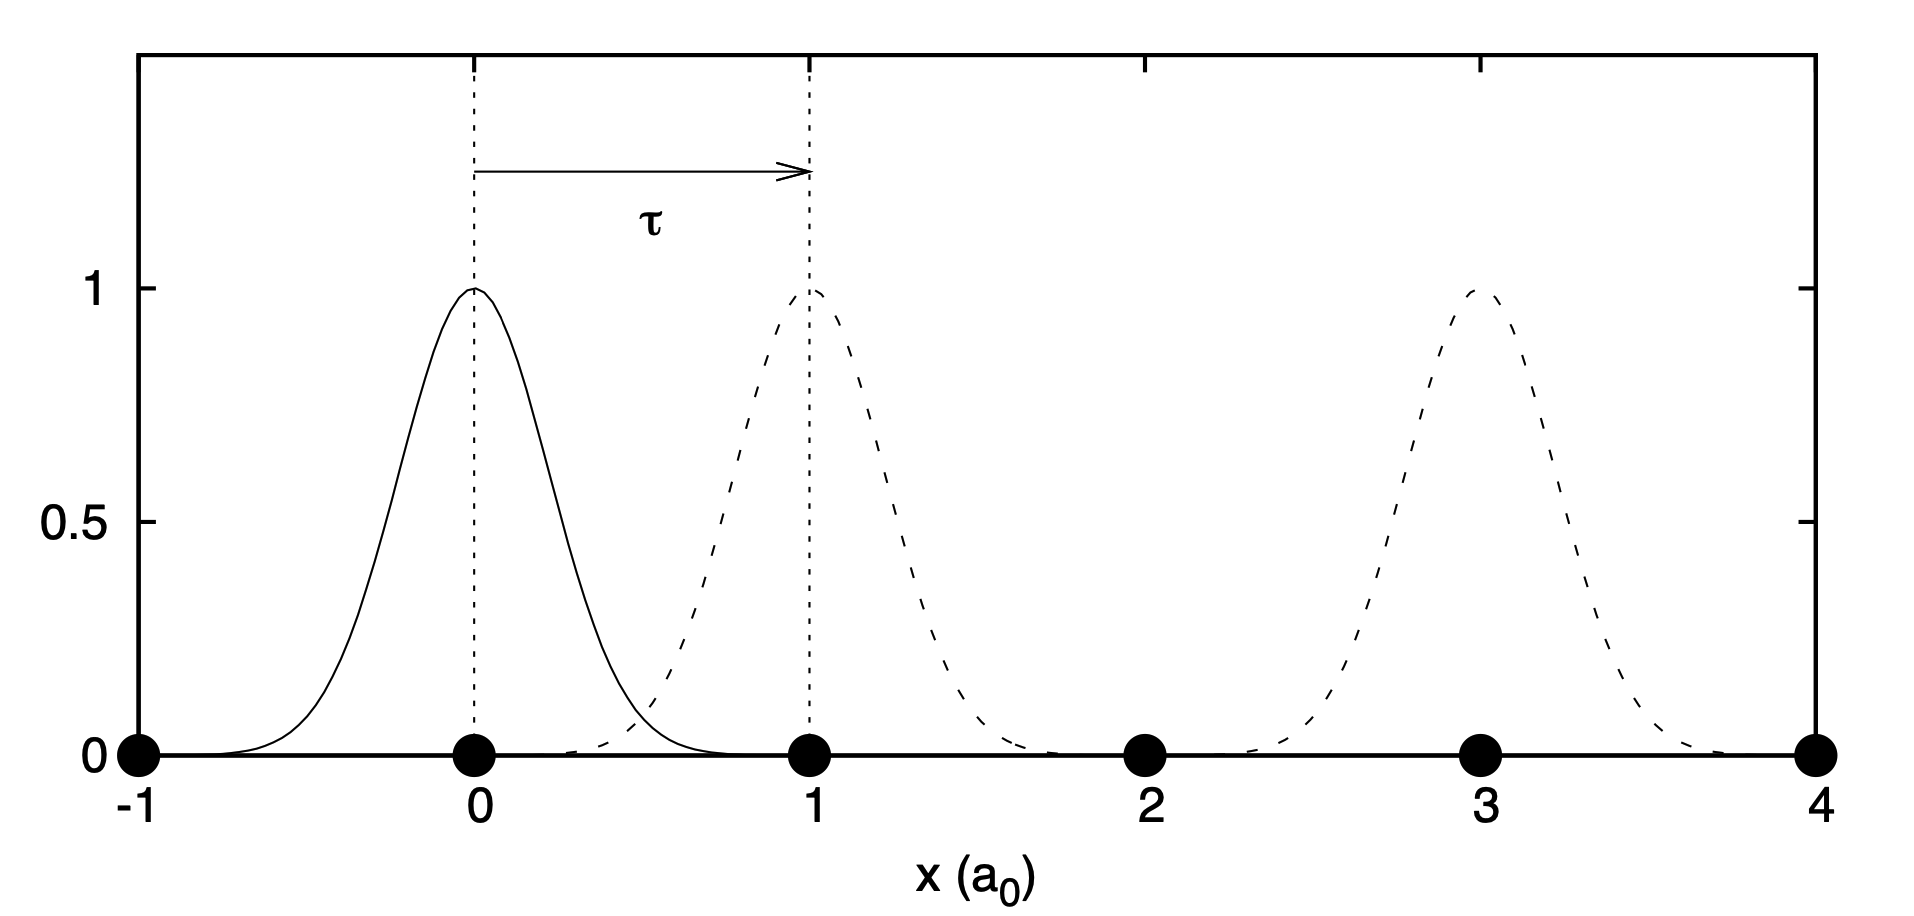

## 1D s band crystal
### Simple model for a 1D chain can be constructed by using $\boldsymbol{n}=\pm a$
### Where $a$ is the lattice constant
### E(k) takes the following form,

### $\begin{aligned} E(k) &=\epsilon-t\left(e^{i k a}+e^{-i k a}\right) \\ &=\epsilon-2 t \cos \left(k a\right) \end{aligned}$

### Above dispersion relation can be calculated on the Brillouin Zone with boundaries $[-\frac{\pi}{a},\frac{\pi}{a}]$

In [517]:
#Import Libraries

#Numerical manipulation
import numpy as np

#Plotting routine
import matplotlib.pyplot as plt

In [467]:
#Define constant

# On-site energy 
ϵ = 0.3 #eV

# Hopping constant
t = 0.5 # eV

# Lattice spacing
a = 3  # Angstrom

# N number of atoms
N = 10000

# Reciprocal space length
bz = 2*np.pi/a

# Define reciprocal space symmetrically
k = np.linspace(-bz/2,bz/2,N)

In [468]:
#Define energy function
def s_band_energy(k, ϵ, t, a):
    E = ϵ - 2*t*np.cos(k*a)
    return E

In [469]:
#Calculate energy
energy = s_band_energy(k,ϵ,t,a)

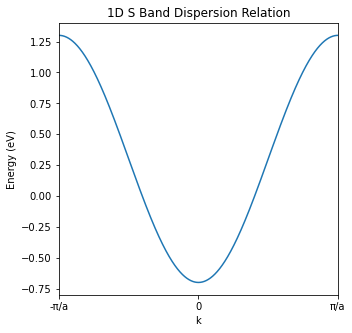

In [513]:
#Plot energy on k space
fig = plt.figure(figsize=(5,5))
plt.plot(k,energy)
plt.title("1D S Band Dispersion Relation")
plt.xlabel("k")
plt.ylabel("Energy (eV)")
plt.xticks([np.min(k),0,np.max(k)],["-π/a","0","π/a"])
plt.xlim([np.min(k),np.max(k)])
plt.show()

## Density of States
$g(E) = \frac{1}{N}\sum_{i}^N\delta(E-E_i) $

In [516]:
# Define DOS function
def density_of_states(E,dE):
    
    #Initial empty array for dos
    dos = np.zeros(len(E))
    
    #Iterate over each energy
    for i in range(len(E)):
        #Delta function approxiation for given value of energy over all states
        delta_array = np.where( abs(E[i]-E) < dE , np.ones(len(energy)),0)
        delta_average  = np.average(delta_array)
        dos[i] = delta_average
    return dos

In [532]:
#Calculate density of states for the given energy distribution
dos = density_of_states(energy,1e-3)

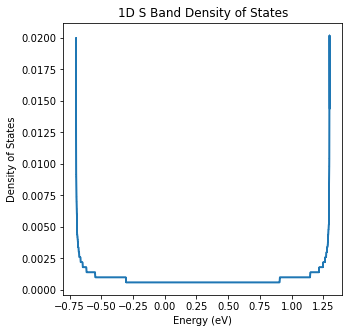

In [533]:
#Plot DOS on energy space
fig = plt.figure(figsize=(5,5))
plt.plot(energy,dos)
plt.title("1D S Band Density of States")
plt.xlabel("Energy (eV)")
plt.ylabel("Density of States")
plt.show()